一、被动投资与主动投资
---
**被动性基金即不主动寻求取得超越市场表现，而是试图复制指数的表现，以期望获得市场平均收益的基金。被动性基金一般选取特定的指数作为跟踪的对象，因此，指数型基金通常都是被动性基金。 按照投资方式的不同，基金可以分为主动投资基金和被动投资基金。简单的说，主动的投资基金管理者试图通过选择证券和市场择机等手段战胜市场（或相关基准）。与之相反，被动投资基金不进行选择证券和市场择机的主观预测，着眼于长远，致力于获得与市场整体相近的回报（参考表格1）。被动性基金即不主动寻求取得超越市场表现，而是试图复制指数的表现，以期望获得市场平均收益的基金。被动性基金一般选取特定的指数作为跟踪的对象，因此，指数型基金通常都是被动性基金**。
   ![图片注释](http://storage.uqer.io/5b0ff203641808011561463c/1674f68e-a74a-11e8-bd3c-0242ac140002)
   

二、指数基金  
---
 **指数基金即采用指数化投资的基金产品，具有费用低、长生不老、无非系统性风险、收益风险更容易预测等优点，随着市场有效性越来越强，其相对于主动投资基金的优势越来越明显。近年在欧美市场，指数化投资快速发展，规模快速增长，成为投资领域的大趋势和主流。美国先锋集团依靠指数基金的发展一举成为美国管理规模最大的基金管理公司。而当前在中国市场，指数基金发展才刚刚起步，指数基金的规模还比较小，主动投资基金仍然是市场的主流，中国的指数基金革命将很快到来。**

 三、指数增强基金
 ---
**指数增强基金：指数增强基金是指在追踪指数的同时，通过一系列方法取得超越指数收益的一类基金，这里说的一系列方式主要方法是阿尔法增强，即通过量化或者主观的方法，根据市场行情变化，适当对投资组合进行调整，以期获得更好的收益。指数增强基金保持对指数一定程度的跟踪，并且获得超越指数的收益，是指数基金的进阶版本，是被动投资与主动投资的结合。**
  


四、实证分析    
---
**那么指数基金和指数增强基金那个更好呢，这个没有定论，要具体情况具体分析，在美国市场，整体来看指数增强基金相对指数基金的超额收益不明显或不显著，指数基金在美国更受欢迎。 中国市场的情况是什么样的呢？ 下文我们就基于优矿量化投资平台和通联数据，选择基于沪深 300 ，中证 500 等宽基指数的指数基金和指数增强基金产品做对比分析：**

筛选出要比较的基金
---
A、	筛选出沪深300、中证500增强基金和指数基金（选择ETF联接基金替代）
B、	基于沪深300指数的基金选择成立5年以上的基金
C、	基于中证500指数的基金选择成立2年以上的基金



In [ ]:
#加包
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt

In [ ]:

#取出基金基本信息，剔除分级基金、封闭基金、FOF基金、QDII基金
fund_sec = DataAPI.SecIDGet(assetClass=u"F",pandas="1")
fund_info = DataAPI.FundGet(secID=fund_sec.secID,pandas="1")
fund_leverage = DataAPI.FundLeverageInfoGet(secID=u"",ticker=u"",exchangeCDLeverage=u"XSHG,XSHE",field=u"",pandas="1")
fund_info = fund_info[[x not in fund_leverage.secIDLeverage.values for x in fund_info.secID.values]]
fund_info = fund_info[[x not in ['C'] for x in fund_info.operationMode]]
fund_info = fund_info[(fund_info.isFof==0) & (fund_info.isQdii==0) & (fund_info.isGuarFund==0)]
fund_info1=fund_info

In [ ]:
fund_info.head()

,secID,ticker,secShortName,tradeAbbrName,category,operationMode,indexFund,etfLof,isQdii,isFof,...,investField,investTarget,perfBenchmark,circulationShares,isClass,idxID,idxTicker,idxShortName,managementShortName,custodianShortName
0,000001.OFCN,000001,华夏成长,NaN,H,O,NaN,NaN,0,0,...,本基金的投资范围限于具有良好流动性的金融工具，包括国内依法公开发行上市的股票、债券及中国证监...,本基金属成长型基金，主要通过投资于具有良好成长性的上市公司的股票，在保持基金资产安全性和流动...,根据基金合同，本基金暂无业绩比较基准,NaN,0.0,NaN,NaN,NaN,华夏基金,建设银行
1,000003.OFCN,000003,中海可转债债券-A,NaN,B,O,NaN,NaN,0,0,...,本基金主要投资于具有良好流动性的金融工具，包括国内依法发行上市的股票（包含中小板、创业板及其...,本基金以可转换债券为主要投资目标，在严格控制投资组合风险的基础上，充分把握可转换债券兼具股性...,标普中国可转债指数×70%+上海证券交易所上证红利指数×10%+中证综合债券指数×20%,NaN,0.0,NaN,NaN,NaN,中海基金,农业银行
2,000004.OFCN,000004,中海可转债债券-C,NaN,B,O,NaN,NaN,0,0,...,本基金主要投资于具有良好流动性的金融工具，包括国内依法发行上市的股票（包含中小板、创业板及其...,本基金以可转换债券为主要投资目标，在严格控制投资组合风险的基础上，充分把握可转换债券兼具股性...,标普中国可转债指数×70%+上海证券交易所上证红利指数×10%+中证综合债券指数×20%,NaN,0.0,NaN,NaN,NaN,中海基金,农业银行
4,000007.OFCN,000007,鹏华国有企业债债券,NaN,B,O,NaN,NaN,0,0,...,本基金主要投资于固定收益类品种，包括国债、央行票据、金融债、企业债、公司债、短期融资券、中期...,在严格控制投资风险、保持资产流动性的基础上，通过对国有企业债积极主动的投资管理，力争使基金份...,中债-总指数×100％,NaN,0.0,NaN,NaN,NaN,鹏华基金,工商银行
5,000008.OFCN,000008,嘉实中证500ETF联接基金,NaN,E,O,I,NaN,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,紧密跟踪业绩比较基准，追求跟踪偏离度及跟踪误差的最小化，在正常市场情况下，本基金日均跟踪偏离...,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,嘉实基金,建设银行


In [ ]:

#筛选出基金成立时间大于5年的
fund_info['establishDate'] = fund_info['establishDate'].apply(pd.to_datetime)
lag = pd.DateOffset(months=60)
current = dt.datetime.now()
fund_info = fund_info[fund_info['establishDate'] < current - lag]



In [ ]:

#筛选出沪深300指数增强基金和沪深300指数基金（联接基金）
fund_300EI_info = fund_info[[(('增强' in x or '指数增强' in x )and "300" in x) for x in fund_info.secShortName]]
fund_300EI_info =fund_300EI_info[[( "分级" not in x) for x in fund_300EI_info.secShortName]]
fund_300EI_info #沪深300指数增强基金

fund_300I_info = fund_info[[(('联接' in x  )and "300ETF" in x) for x in fund_info.secShortName]]
fund_300I_info =fund_300I_info[[( "分级" not in x) for x in fund_300I_info.secShortName]]
fund_300I_info #沪深300指数基金（联接基金

,secID,ticker,secShortName,tradeAbbrName,category,operationMode,indexFund,etfLof,isQdii,isFof,...,investField,investTarget,perfBenchmark,circulationShares,isClass,idxID,idxTicker,idxShortName,managementShortName,custodianShortName
41,000051.OFCN,000051,华夏沪深300ETF联接-A,NaN,E,O,I,NaN,0,0,...,本基金主要投资于目标ETF基金份额、标的指数成份股、备选成份股。为更好地实现投资目标，基金还...,采用指数化投资方式，追求对标的指数的有效跟踪，获得与标的指数收益相似的回报及适当的其他收益。,沪深300指数×95%+1%,NaN,0.0,000300.ZICN,000300,沪深300,华夏基金,工商银行
6059,110020.OFCN,110020,易方达沪深300ETF联接,NaN,E,O,I,NaN,0,0,...,本基金资产投资于具有良好流动性的金融工具，包括沪深300ETF、沪深300指数成份股及备选成...,紧密跟踪业绩比较基准，追求跟踪偏离度及跟踪误差的最小化。,活期存款利率(税后)×5％+沪深300指数×95％,NaN,0.0,000300.ZICN,000300,沪深300,易方达基金,建设银行
7079,160706.OFCN,160706,嘉实沪深300ETF联接(LOF)-A,嘉实沪深300ETF联接(LOF)-A,E,O,I,LOF,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,本基金进行被动式指数化投资，通过严格的投资纪律约束和数量化的风险管理手段，力争控制本基金的净...,活期存款利率(税后)×5％+沪深300指数×95％,582606463.0,0.0,399300.ZICN,399300,沪深300,嘉实基金,中国银行
7080,160706.XSHE,160706,嘉实沪深300ETF联接(LOF)-A,嘉实沪深300ETF联接(LOF)-A,E,O,I,LOF,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,本基金进行被动式指数化投资，通过严格的投资纪律约束和数量化的风险管理手段，力争控制本基金的净...,活期存款利率(税后)×5％+沪深300指数×95％,582606463.0,0.0,399300.ZICN,399300,沪深300,嘉实基金,中国银行
7949,202015.OFCN,202015,南方开元沪深300ETF联接-A,NaN,E,O,I,NaN,0,0,...,本基金主要投资于目标ETF基金份额、标的指数成份股、备选成份股。本基金投资于目标ETF的比例...,通过投资于目标ETF，紧密跟踪业绩比较基准，追求跟踪偏离度和跟踪误差最小化。,活期存款利率(税后)×5％+沪深300指数×95％,NaN,0.0,000300.ZICN,000300,沪深300,南方基金,工商银行
8147,270026.OFCN,270026,广发中小板300ETF联接,NaN,E,O,I,NaN,0,0,...,本基金投资范围为具有良好流动性的金融工具，包括中小板300ETF、中小板300价格指数成份股...,通过将绝大部分基金资产投资于中小板300ETF，紧密跟踪标的指数的表现，追求跟踪偏离度和跟踪...,活期存款利率(税后)×5%+中小板300×95%,NaN,0.0,399008.ZICN,399008,中小300,广发基金,农业银行
8381,460300.OFCN,460300,华泰柏瑞沪深300ETF联接-A,NaN,E,O,I,NaN,0,0,...,本基金资产投资于具有良好流动性的金融工具，包括沪深300ETF、沪深300指数成份股及备选成...,紧密跟踪业绩比较基准，追求跟踪偏离度及跟踪误差的最小化。,活期存款利率(税后)×5％+沪深300指数×95％,NaN,0.0,000300.ZICN,000300,沪深300,华泰柏瑞基金,工商银行
8398,470068.OFCN,470068,汇添富深证300ETF联接,NaN,E,O,I,NaN,0,0,...,本基金投资于具有良好流动性的金融工具，包括国内依法发行上市的股票（包括中小板、创业板及其他经...,通过投资于目标ETF，紧密跟踪标的指数，追求跟踪偏离度和跟踪误差最小化。,活期存款利率(税后)×5%+深证300指数×95%,NaN,0.0,399344.ZICN,399344,深证300R,汇添富基金,工商银行


In [ ]:
fund_300EI_info

,secID,ticker,secShortName,tradeAbbrName,category,operationMode,indexFund,etfLof,isQdii,isFof,...,investField,investTarget,perfBenchmark,circulationShares,isClass,idxID,idxTicker,idxShortName,managementShortName,custodianShortName
6024,100038.OFCN,100038,富国沪深300增强,NaN,E,O,EI,NaN,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括国内依法发行上市的股票、债券、权证以及中国证...,本基金为增强型股票指数基金，在力求对沪深300指数进行有效跟踪的基础上，通过数量化的方法进行...,沪深300指数×95%+1.5%,NaN,0.0,000300.ZICN,000300,沪深300,富国基金,工商银行
6069,110030.OFCN2,110030,易方达沪深300量化增强,NaN,E,O,EI,NaN,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括国内依法发行上市的股票（含中小板、创业板及其...,本基金为指数增强型股票基金，在力求对标的指数进行有效跟踪的基础上，主要通过运用量化策略进行投...,活期存款利率(税后)×5％+沪深300指数×95％,NaN,0.0,000300.ZICN,000300,沪深300,易方达基金,建设银行
7491,163407.OFCN,163407,兴全沪深300指数增强(LOF),兴全沪深300指数增强(LOF),E,O,EI,LOF,0,0,...,本基金投资范围为具有良好流动性的金融工具，包括投资于国内依法发行上市的股票、债券、权证以及经...,本基金采用指数复制结合相对增强的投资策略，即通过指数复制的方法拟合、跟踪沪深300指数，并在...,同业存款利息率×5％+沪深300指数×95％,21131596.0,0.0,399300.ZICN,399300,沪深300,兴全基金,农业银行
7492,163407.XSHE,163407,兴全沪深300指数增强(LOF),兴全沪深300指数增强(LOF),E,O,EI,LOF,0,0,...,本基金投资范围为具有良好流动性的金融工具，包括投资于国内依法发行上市的股票、债券、权证以及经...,本基金采用指数复制结合相对增强的投资策略，即通过指数复制的方法拟合、跟踪沪深300指数，并在...,同业存款利息率×5％+沪深300指数×95％,21131596.0,0.0,399300.ZICN,399300,沪深300,兴全基金,农业银行
7707,166007.OFCN,166007,中欧沪深300指数增强(LOF)-A,中欧沪深300指数增强(LOF)-A,E,O,EI,LOF,0,0,...,本基金投资范围限于具有良好流动性的金融工具，包括股票、债券、权证、货币市场工具、资产支持证券...,本基金采用指数增强型投资策略。以沪深300指数作为基金投资组合跟踪的标的指数。在对标的指数有...,活期存款利率(税后)×5％+沪深300指数×95％,581265.0,0.0,399300.ZICN,399300,沪深300,中欧基金,兴业银行
7708,166007.XSHE,166007,中欧沪深300指数增强(LOF)-A,中欧沪深300指数增强(LOF)-A,E,O,EI,LOF,0,0,...,本基金投资范围限于具有良好流动性的金融工具，包括股票、债券、权证、货币市场工具、资产支持证券...,本基金采用指数增强型投资策略。以沪深300指数作为基金投资组合跟踪的标的指数。在对标的指数有...,活期存款利率(税后)×5％+沪深300指数×95％,581265.0,0.0,399300.ZICN,399300,沪深300,中欧基金,兴业银行
7784,167901.OFCN,167901,华宸未来沪深300指数增强(LOF),华宸未来沪深300指数增强(LOF),E,O,EI,LOF,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括沪深300指数的成份股、备选成份股、非成份股...,本基金为增强型股票指数基金，在力求对沪深300指数进行有效跟踪的基础上，通过数量化的方法进行...,活期存款利率(税后)×5％+沪深300指数×95％,608362.0,0.0,NaN,NaN,NaN,华宸未来基金,中信银行
7785,167901.XSHE,167901,华宸未来沪深300指数增强(LOF),华宸未来沪深300指数增强(LOF),E,O,EI,LOF,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括沪深300指数的成份股、备选成份股、非成份股...,本基金为增强型股票指数基金，在力求对沪深300指数进行有效跟踪的基础上，通过数量化的方法进行...,活期存款利率(税后)×5％+沪深300指数×95％,608362.0,0.0,NaN,NaN,NaN,华宸未来基金,中信银行
8066,233010.OFCN,233010,大摩深证300指数增强,NaN,E,O,EI,NaN,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括国内依法发行上市的股票（包含中小板、创业板及...,本基金为股票指数增强型基金，以深证300指数作为本基金投资组合跟踪的目标指数。本基金在有效跟...,活期存款利率(税后)×5％+深证300价格指数×95％,NaN,0.0,399007.ZICN,399007,深证300,摩根士丹利华鑫基金,建设银行
8184,310318.OFCN2,310318,申万菱信沪深300指数增强,NaN,E,O,EI,NaN,0,0,...,本基金投资于具有良好流动性的金融工具，包括国内依法发行上市的股票、债券、权证、股指期货、资产...,本基金为增强型指数基金，通过数量化的投资方法与严格的投资纪律约束，力争控制本基金净值增长率与...,沪深300指数×95%+1.5%,NaN,0.0,000300.ZICN,000300,沪深300,申万菱信基金,工商银行


In [ ]:
#筛选出基金成立时间大于2年的
fund_info1['establishDate'] = fund_info1['establishDate'].apply(pd.to_datetime)
lag = pd.DateOffset(months=24)
current = dt.datetime.now()
fund_info1 = fund_info1[fund_info1['establishDate'] < current - lag]

In [ ]:
#筛选出中证500指数增强基金和指数基金（联接基金）
fund_500EI_info = fund_info1[[(('增强' in x or '指数增强' in x )and "500" in x) for x in fund_info1.secShortName]]
fund_500EI_info #中证500指数增强基金


fund_500I_info = fund_info1[[(('联接' in x  )and "500ETF" in x) for x in fund_info1.secShortName]]
fund_500I_info =fund_500I_info[[( "分级" not in x) for x in fund_500I_info.secShortName]]
fund_500I_info #中证500指数基金（联接基金）

,secID,ticker,secShortName,tradeAbbrName,category,operationMode,indexFund,etfLof,isQdii,isFof,...,investField,investTarget,perfBenchmark,circulationShares,isClass,idxID,idxTicker,idxShortName,managementShortName,custodianShortName
5,000008.OFCN,000008,嘉实中证500ETF联接基金,NaN,E,O,I,NaN,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,紧密跟踪业绩比较基准，追求跟踪偏离度及跟踪误差的最小化，在正常市场情况下，本基金日均跟踪偏离...,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,嘉实基金,建设银行
960,001052.OFCN,001052,华夏中证500ETF联接,NaN,E,O,I,NaN,0,0,...,本基金主要投资于目标ETF基金份额、标的指数成份股、备选成份股。为更好地实现投资目标，基金还...,通过对目标ETF基金份额的投资，追求跟踪标的指数，获得与指数收益相似的回报。,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,华夏基金,建设银行
1101,001214.OFCN,001214,华泰柏瑞中证500ETF联接-A,NaN,E,O,I,NaN,0,0,...,本基金资产投资于具有良好流动性的金融工具，包括目标ETF、标的指数成份股及备选成份股、非成份...,紧密跟踪业绩比较基准，追求跟踪偏离度及跟踪误差的最小化。,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,华泰柏瑞基金,中国银行
1128,001241.OFCN,001241,国寿安保中证500ETF联接,NaN,E,O,I,NaN,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。此外，为更好地实现投资...,通过主要投资于中证500交易型开放式指数证券投资基金，紧密跟踪标的指数即中证500指数的表现...,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,国寿安保基金,农业银行
1237,001351.OFCN,001351,诺安中证500ETF联接,NaN,E,O,I,NaN,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,通过将绝大部分基金财产投资于诺安中证500ETF，密切跟踪业绩比较基准，追求跟踪偏离度和跟踪...,中证小盘500指数×100％,NaN,0.0,000905.ZICN,000905,中证500,诺安基金,中国银行
1337,001455.OFCN,001455,景顺长城中证500ETF联接,NaN,E,O,I,NaN,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。此外，为更好地实现投资...,紧密跟踪标的指数，追求跟踪偏离度和跟踪误差的最小化。,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,景顺长城基金,中国银行
2810,002903.OFCN,002903,广发中证500ETF联接(LOF)-C,NaN,E,O,I,NaN,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,本基金通过投资于目标ETF，紧密跟踪业绩比较基准，追求跟踪偏离度和跟踪误差最小化。,活期存款利率(税后)×5%+中证小盘500指数×95%,NaN,0.0,000905.ZICN,000905,中证500,广发基金,工商银行
7432,162711.OFCN,162711,广发中证500ETF联接(LOF)-A,广发中证500ETF联接(LOF)-A,E,O,I,LOF,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,本基金通过投资于目标ETF，紧密跟踪业绩比较基准，追求跟踪偏离度和跟踪误差最小化。,活期存款利率(税后)×5%+中证小盘500指数×95%,20435168.0,0.0,000905.ZICN,000905,中证500,广发基金,工商银行
7433,162711.XSHE,162711,广发中证500ETF联接(LOF)-A,广发中证500ETF联接(LOF)-A,E,O,I,LOF,0,0,...,本基金以目标ETF基金份额、标的指数成份股及备选成份股为主要投资对象。本基金投资于目标ETF...,本基金通过投资于目标ETF，紧密跟踪业绩比较基准，追求跟踪偏离度和跟踪误差最小化。,活期存款利率(税后)×5%+中证小盘500指数×95%,20435168.0,0.0,000905.ZICN,000905,中证500,广发基金,工商银行


In [ ]:
fund_500EI_info

,secID,ticker,secShortName,tradeAbbrName,category,operationMode,indexFund,etfLof,isQdii,isFof,...,investField,investTarget,perfBenchmark,circulationShares,isClass,idxID,idxTicker,idxShortName,managementShortName,custodianShortName
420,000478.OFCN,000478,建信中证500指数增强-A,NaN,E,O,EI,NaN,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括国内依法发行上市的股票（包含中小板、创业板及...,本基金为股票型指数增强基金，在对标的指数进行有效跟踪的被动投资基础上，结合增强型的主动投资，...,活期存款利率×5%+中证小盘500指数×95%,NaN,0.0,000905.ZICN,000905,中证500,建信基金,中信银行
2192,002311.OFCN,002311,创金合信中证500指数增强-A,NaN,E,O,EI,NaN,0,0,...,本基金的投资范围包括国内依法发行上市的股票（包括创业板、中小板以及其他经中国证监会允许基金投...,本基金为指数增强型股票基金，采取定量方法进行组合管理，力争在控制本基金净值增长率与业绩比较基...,一年期定期存款利率(税后)×5%+中证小盘500指数×95%,NaN,0.0,000905.ZICN,000905,中证500,创金合信基金,招商银行
2197,002316.OFCN,002316,创金合信中证500指数增强-C,NaN,E,O,EI,NaN,0,0,...,本基金的投资范围包括国内依法发行上市的股票（包括创业板、中小板以及其他经中国证监会允许基金投...,本基金为指数增强型股票基金，采取定量方法进行组合管理，力争在控制本基金净值增长率与业绩比较基...,一年期定期存款利率(税后)×5%+中证小盘500指数×95%,NaN,0.0,000905.ZICN,000905,中证500,创金合信基金,招商银行
2394,002510.OFCN,002510,申万菱信中证500指数增强,NaN,E,O,EI,NaN,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括国内依法发行上市的股票（包括主板、中小板、创...,本基金为增强型股票指数基金，通过数量化的投资方法与严格的投资纪律约束，力争控制本基金净值增长...,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,申万菱信基金,工商银行
2921,003016.OFCN,003016,中金中证500指数增强-A,NaN,E,O,EI,NaN,0,0,...,本基金投资范围主要为标的指数成分股及备选成分股。此外，为更好地实现投资目标，本基金可少量投资...,本基金为股票指数增强型发起式证券投资基金，在力求对中证500指数进行有效跟踪的基础上，通过数...,活期存款利率(税后)×5％+中证小盘500指数×95％,NaN,0.0,000905.ZICN,000905,中证500,中金基金,工商银行
7150,161017.OFCN,161017,富国中证500指数增强(LOF),富国中证500指数增强(LOF),E,O,EI,LOF,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括国内依法发行上市的股票（包括创业板、中小板及...,本基金为增强型股票指数基金，在力求对中证500指数进行有效跟踪的基础上，通过数量化的方法进行...,中证小盘500指数×95%+1%,23762089.0,0.0,000905.ZICN,000905,中证500,富国基金,农业银行
7151,161017.XSHE,161017,富国中证500指数增强(LOF),富国中证500指数增强(LOF),E,O,EI,LOF,0,0,...,本基金的投资范围为具有良好流动性的金融工具，包括国内依法发行上市的股票（包括创业板、中小板及...,本基金为增强型股票指数基金，在力求对中证500指数进行有效跟踪的基础上，通过数量化的方法进行...,中证小盘500指数×95%+1%,23762089.0,0.0,000905.ZICN,000905,中证500,富国基金,农业银行


In [ ]:


#获得沪深300指数增强基金和沪深300指数基金净值
beginDate="20130822"
endDate="20180822"

data_300EI = DataAPI.FundNavGet(dataDate=u"",secID=fund_300EI_info['secID'],beginDate=beginDate,endDate=endDate,field=u"",pandas="1")
#获得有基金净值数据的基金代码

data_300I = DataAPI.FundNavGet(dataDate=u"",secID=fund_300I_info['secID'],beginDate=beginDate,endDate=endDate,field=u"",pandas="1")

fund_300EI = set(list(data_300EI['secID']))

fund_300I = set(list(data_300I['secID']))


In [ ]:
data_300EI.head()

,secID,ticker,secShortName,endDate,NAV,publishDate,ACCUM_NAV,currencyCd,ADJUST_NAV,navChg,navChgPct,adjNavChgPct
0,100038.OFCN,100038,富国沪深300增强,2013-08-22,0.801,2013-08-23,0.801,CNY,0.801,-0.001,-0.1247,-0.1247
1,100038.OFCN,100038,富国沪深300增强,2013-08-23,0.796,2013-08-24,0.796,CNY,0.796,-0.005,-0.6242,-0.6242
2,100038.OFCN,100038,富国沪深300增强,2013-08-26,0.812,2013-08-27,0.812,CNY,0.812,0.016,2.0101,2.0101
3,100038.OFCN,100038,富国沪深300增强,2013-08-27,0.812,2013-08-28,0.812,CNY,0.812,0.000,0.0000,0.0000
4,100038.OFCN,100038,富国沪深300增强,2013-08-28,0.808,2013-08-29,0.808,CNY,0.808,-0.004,-0.4926,-0.4926


In [ ]:
data_300I.head()

,secID,ticker,secShortName,endDate,NAV,publishDate,ACCUM_NAV,currencyCd,ADJUST_NAV,navChg,navChgPct,adjNavChgPct
0,000051.OFCN,000051,华夏沪深300ETF联接-A,2013-08-22,0.696,2013-08-23,0.696,CNY,0.696,-0.001,-0.1435,-0.1435
1,000051.OFCN,000051,华夏沪深300ETF联接-A,2013-08-23,0.691,2013-08-24,0.691,CNY,0.691,-0.005,-0.7184,-0.7184
2,000051.OFCN,000051,华夏沪深300ETF联接-A,2013-08-26,0.705,2013-08-27,0.705,CNY,0.705,0.014,2.0260,2.0260
3,000051.OFCN,000051,华夏沪深300ETF联接-A,2013-08-27,0.706,2013-08-28,0.706,CNY,0.706,0.001,0.1418,0.1418
4,000051.OFCN,000051,华夏沪深300ETF联接-A,2013-08-28,0.703,2013-08-29,0.703,CNY,0.703,-0.003,-0.4249,-0.4249


In [ ]:
fund_300I

{'000051.OFCN',
 '110020.OFCN',
 '160706.XSHE',
 '202015.OFCN',
 '270026.OFCN',
 '460300.OFCN',
 '470068.OFCN'}

In [ ]:
fund_300EI

{'100038.OFCN',
 '110030.OFCN2',
 '163407.XSHE',
 '166007.XSHE',
 '167901.XSHE',
 '233010.OFCN',
 '310318.OFCN2',
 '450008.OFCN',
 '519116.OFCN',
 '700002.OFCN'}

In [ ]:
#获得中证500指数增强基金和指数基金

beginDate="20160822"
endDate="20180822"

data_500EI = DataAPI.FundNavGet(dataDate=u"",secID=fund_500EI_info['secID'],beginDate=beginDate,endDate=endDate,field=u"",pandas="1")
#获得有基金净值数据的基金代码


data_500I = DataAPI.FundNavGet(dataDate=u"",secID=fund_500I_info['secID'],beginDate=beginDate,endDate=endDate,field=u"",pandas="1")

fund_500I = set(list(data_500I['secID']))
fund_500EI = set(list(data_500EI['secID']))

In [ ]:
fund_500I

{'000008.OFCN',
 '001052.OFCN',
 '001214.OFCN',
 '001241.OFCN',
 '001351.OFCN',
 '001455.OFCN',
 '002903.OFCN',
 '162711.XSHE'}

In [ ]:
fund_500EI

{'000478.OFCN',
 '002311.OFCN',
 '002316.OFCN',
 '002510.OFCN',
 '003016.OFCN',
 '161017.XSHE'}

In [ ]:
#计算收益率

def CalcReturns(fundpool,data):
    returns = {}
    for fund in fundpool:
        temp = data[data['secID']==fund]
        temp = temp.set_index('endDate')
        value = temp['ADJUST_NAV']
        new_index = value.index[1:]
        diff = value.diff()[1:]
        diff = np.array(diff)
        pre_value = np.array(value[:-1])
        ret = diff/pre_value
        ret = pd.Series(ret,index=new_index)
        returns.update({fund:ret})
    return returns

returns_300EI = CalcReturns(fund_300EI,data_300EI)

returns_300I = CalcReturns(fund_300I,data_300I)


In [ ]:

returns_500EI = CalcReturns(fund_500EI,data_500EI)

returns_500I = CalcReturns(fund_500I,data_500I)


**二、计算基金的指标：基金表现的几乎所有信息包含在其复权净值变化中，对于复权净值的变化，有收益类评价指标，有风险类评价指标，也有风险调整后收益类评价指标。后者为前两者的结合，用于衡量单位风险下基金的收益水平。**


####  **2.2.1收益类指标**

1. **历史收益率（HR）**: 样本的年化收益率。
2. **超额收益率（Alpha）**： 基金的收益可以分解为市场收益和基金管理人创造的超额收益，我们利用基金指数或者基金基准的收益率对基金收益率进行OLS回归，得到基金对其基准的风险因子β，再用计算α： $$ Alpha = \mu - \beta * \mu_b   ,  \beta = \frac{\sum_{i=1}^N r_i * b_i - N \bar r \bar b}{\sum_{i=1}^N b_i^2-N \bar b^2}$$ 

####  **2.2.2风险类指标**

1. **调整在险值（MVaR）**： 调整在险值是利用收益率偏度和峰度对传统在险值调整后的指标。传统的在险值（VaR）无法捕捉基金收益率肥尾属性，因此提出调整在险值。调整在险值的公式如下：$$ MVaR_\alpha  = \mu + ( z_c + \frac{1}{6}(z_c^2 -1)S + \frac{1}{24}(z_c^3 - 3z_c)K - \frac{1}{36}(2z_c^3 - 5z_c)S^2 )\sigma$$ 其中zc，是正态分布在置信度为α%下的临界值。而 μ、σ、S、K则为样本收益率分布的均值，标准差，偏度，峰度。此指标意味着在调整了收益率分布偏度和峰度后，未来有 α%的概率收益率不会低于MVaRα。
2. **最大回撤（MD）**: 净值历史回撤幅度最大值
3. **平均回撤（AD）** : 样本数据所有回撤加权平均值。 $$ AD = \sum_{i=0}^{N-1} DD_{N-1} * 0.9^i $$
4. **负向收益波动率（LPM）** : 仅计算样本负向收益的波动率。
5. **收益波动率（SIGMA）** : 样本收益率的波动率。

####  **2.2.3 风险调整后收益类指标**

由上面的指标，收益类和风险类两两结合，可得 2*5 =10 个新指标，作为风险调整后的收益率指标：

1. **H_Mvar** (HR/exp(MVaR))
2. **CR** (卡玛比率, HR/abs(MD))
3. **H_Ad** (HR/abs(AD))
4. **SoR** (索提诺比率, HR/LPM)
5. **SR** (夏普比率, HR/SIGMA)
6. **A_Mvar** (Alpha/exp(MVaR))
7. **A_Md** (Alpha/abs(MD))
8. **A_Ad** (Alpha/abs(AD))
9. **XR** (X比率, Alpha/LPM)
10. **IR** (信息比率, Alpha/SIGMA)

In [ ]:

# 各指标计算函数
# HR 历史收益率
def CalcHR(fundRet):
    n = len(fundRet)
    endValue =1
    for i in range(n):
        endValue *= (1+fundRet[i])
    # 年化：
    annReturn = endValue**(250.00/n) -1
    return annReturn
        
# Alpha    
def CalcAlpha(fundRet,indexRet):
    n = len(fundRet)
    beta = float(((fundRet*indexRet).sum() - n*(fundRet.mean())*(indexRet.mean()))) / ((indexRet**2).sum() - n*((indexRet.mean())**2))
    alpha = fundRet.mean() - beta*indexRet.mean()
    return alpha

# MVaR
def CalcMVaR(fundRet,level):
    mu = fundRet.mean()
    sigma = fundRet.std()
    S = fundRet.skew()
    K = fundRet.kurtosis()
    z = fundRet.quantile(level)
    MVaR = mu + (z + (1.00/6)*(z**2 -1)*S + (1.00/24)*(z**3-3*z)*K - (1.00/36)*(2*(z**3)-5*z)*(S**2))*sigma
    return MVaR

# 最大回撤 MD
def CalcMD(netvalue):
    netvalue = np.array(netvalue)
    length = len(netvalue)
    drawdown = []
    py =netvalue[0]
    for i in range(1,length):
        px = netvalue[i]
        py = max(netvalue[:i])
        drawdown.append(1-(px/py))
    return max(drawdown)

# 平均回撤 AD
def CalcAD(netvalue):
    netvalue = np.array(netvalue)
    N = len(netvalue)
    AD = 0
    py =netvalue[0]
    for i in range(1,N):
        px = netvalue[i]
        py = max(netvalue[:i])
        DD = (1-(float(px)/py))
        AD += DD*(0.9**(N-i))
    return AD

# 负向收益波动率(年化)LPM
def CalcLPM(fundRet):
    fundRet = fundRet[fundRet<0]
    LPM = fundRet.std()*np.sqrt(250)
    return LPM

# 收益波动率（年化）SIGMA
def CalcSIGMA(fundRet):
    return fundRet.std()*np.sqrt(250)


# 自动计算基础指标并返回所有指标
def AutoCalculate(fundRet,indexRet,netvalue,level):
    ret = {}
    HR = CalcHR(fundRet)
    Alpha = CalcAlpha(fundRet,indexRet)
    MVaR = CalcMVaR(fundRet,level)
    MD = CalcMD(netvalue)
    AD = CalcAD(netvalue)
    LPM = CalcLPM(fundRet)
    SIGMA = CalcSIGMA(fundRet)
    #由于风险类指标是小，基金表现越优，要转换成其倒数
    dMVaR=np.exp( MVaR*-1.0)
    dMD=np.exp( MD*-1.0)
    dAD=np.exp( AD*-1.0)
    dLPM=np.exp(LPM*-1.0)
    dSIGMA=np.exp(SIGMA*-1.0)
    
    ret.update({'HR':HR,'Alpha':Alpha,'dMVaR':dMVaR,'dMD':dMD,'dAD':dAD,'dLPM':dLPM,'dSIGMA':dSIGMA})
    H_Mvar =  HR/(np.exp(MVaR))
    CR = HR/np.abs(MD)
    H_Ad = HR/np.abs(AD)
    SoR = HR/LPM
    SR = HR/SIGMA
    A_Mvar = Alpha/(np.exp(MVaR))
    A_Md = Alpha/np.abs(MD)
    A_Ad = Alpha/np.abs(AD)
    XR = Alpha/LPM
    IR = Alpha/SIGMA
    ret.update({'H_Mvar': H_Mvar,'CR':CR,'H_Ad':H_Ad,'SoR':SoR,'SR':SR,'A_Mvar':A_Mvar,'A_Md':A_Md,'A_Ad':A_Ad,'XR':XR,'IR':IR})
    return ret

In [ ]:

# 计算混合型基金指数
def CalcFundIndex(data):
    datelist = list(pd.Series(list(set(list(data['endDate'])))).sort_values())
    IndexValue = {}
    for date in datelist:
        temp = data[data['endDate']==date]
        IndexValue.update({date:temp['ADJUST_NAV'].mean()})  # 等权合成基金指数
    IndexValue = pd.Series(IndexValue)
    IndexValue = IndexValue/IndexValue.iloc[0]
    return IndexValue
Indextype_300EI = CalcFundIndex(data_300EI)  # 混合型基金指数
Indextype_300I = CalcFundIndex(data_300I) 


In [ ]:
Indextype_300EI.head()

2013-08-22    1.000000
2013-08-23    0.993701
2013-08-26    1.012321
2013-08-27    1.015200
2013-08-28    1.008779
dtype: float64

In [ ]:
Indextype_300I.head()

2013-08-22    1.000000
2013-08-23    0.994499
2013-08-26    1.013899
2013-08-27    1.016251
2013-08-28    1.009155
dtype: float64

In [ ]:
Indextype_500EI = CalcFundIndex(data_500EI)  # 混合型基金指数
Indextype_500I = CalcFundIndex(data_500I) 

In [ ]:
Indextype_500EI.head()

2016-08-22    1.000000
2016-08-23    1.002021
2016-08-24    1.003789
2016-08-25    0.997833
2016-08-26    1.002118
dtype: float64

In [ ]:
Indextype_500I.head()

2016-08-22    1.000000
2016-08-23    1.001145
2016-08-24    1.002097
2016-08-25    0.994610
2016-08-26    0.998611
dtype: float64

In [ ]:
#计算混合型基金指数收益，计算指标时需要
def CalcIndexReturns(IndexData):
    new_index = IndexData.index[1:]
    diff = IndexData.diff()[1:]
    diff = np.array(diff)
    pre_value = np.array(IndexData[:-1])
    ret = diff/pre_value
    ret = pd.Series(ret,index=new_index)
    return ret

returns_Index_300EI = CalcIndexReturns(Indextype_300EI)
returns_Index_300I = CalcIndexReturns(Indextype_300I)


In [ ]:
returns_Index_300EI.head()

2013-08-23   -0.006299
2013-08-26    0.018738
2013-08-27    0.002843
2013-08-28   -0.006325
2013-08-29   -0.003951
dtype: float64

In [ ]:
returns_Index_300I.head()

2013-08-23   -0.005501
2013-08-26    0.019507
2013-08-27    0.002320
2013-08-28   -0.006982
2013-08-29   -0.004095
dtype: float64

In [ ]:
returns_Index_500EI = CalcIndexReturns(Indextype_500EI)
returns_Index_500I = CalcIndexReturns(Indextype_500I)

In [ ]:
returns_Index_500EI.head()

2016-08-23    0.002021
2016-08-24    0.001764
2016-08-25   -0.005933
2016-08-26    0.004294
2016-08-29    0.003720
dtype: float64

In [ ]:
returns_Index_500I.head()

2016-08-23    0.001145
2016-08-24    0.000951
2016-08-25   -0.007471
2016-08-26    0.004022
2016-08-29    0.002486
dtype: float64

In [ ]:


#计算各指标，并保存为pd.dataframe
ret300EI = {}                                           
for fund in fund_300EI:
    try:
        fundRet = returns_300EI[fund]
        temp = data_300EI[data_300EI['secID']==fund]
        temp = temp.set_index('endDate')
        netvalue = temp['ADJUST_NAV']
        calc = AutoCalculate(fundRet,returns_Index_300EI,netvalue,0.05) # 计算各指标
        ret300EI.update({fund:calc})
    except:  # 如果可观测的数据不够
        pass
ret300EI = pd.DataFrame(ret300EI) #转换成pd数据框
ret300EI = ret300EI.transpose() #转值
ret300EI

,A_Ad,A_Md,A_Mvar,Alpha,CR,HR,H_Ad,H_Mvar,IR,SR,SoR,XR,dAD,dLPM,dMD,dMVaR,dSIGMA
100038.OFCN,0.000105,0.000425,0.000164,0.000165,0.409004,0.158331,0.100601,0.157938,0.000734,0.705956,0.830648,0.000864,0.207244,0.826454,0.679014,0.997521,0.799092
110030.OFCN2,0.000069,0.000271,0.000117,0.000117,0.341945,0.147884,0.086710,0.147473,0.000505,0.636169,0.736588,0.000584,0.181680,0.818101,0.648898,0.997219,0.792581
163407.XSHE,0.000104,0.000403,0.000165,0.000166,0.387613,0.159103,0.099923,0.158655,0.000713,0.685035,0.799677,0.000832,0.203467,0.819583,0.663339,0.997181,0.792744
166007.XSHE,-0.000021,-0.000137,-0.000063,-0.000064,0.207305,0.096316,0.032497,0.096072,-0.000277,0.420028,0.487294,-0.000321,0.051622,0.820653,0.628380,0.997472,0.795084
167901.XSHE,0.000052,0.000413,0.000184,0.000184,0.274315,0.122443,0.034890,0.122100,0.000655,0.435441,0.511957,0.000770,0.029914,0.787283,0.639953,0.997200,0.754882
233010.OFCN,-0.000050,-0.000430,-0.000217,-0.000218,0.117030,0.059359,0.013549,0.059188,-0.000807,0.219627,0.248023,-0.000911,0.012513,0.787155,0.602172,0.997118,0.763171
310318.OFCN2,0.000064,0.000301,0.000129,0.000129,0.355501,0.152093,0.075803,0.151680,0.000544,0.641520,0.754713,0.000640,0.134470,0.817484,0.651924,0.997286,0.788927
450008.OFCN,-0.000041,-0.000283,-0.000127,-0.000127,0.176567,0.079569,0.025910,0.079365,-0.000550,0.343794,0.396124,-0.000634,0.046377,0.818019,0.637216,0.997429,0.793386
519116.OFCN,0.000008,0.000034,0.000014,0.000014,0.278056,0.116403,0.065833,0.116117,0.000062,0.514110,0.597053,0.000072,0.170646,0.822865,0.657946,0.997538,0.797385
700002.OFCN,-0.000044,-0.000350,-0.000179,-0.000179,0.130178,0.066545,0.016316,0.066378,-0.000688,0.255366,0.300237,-0.000808,0.016935,0.801204,0.599787,0.997498,0.770600


In [ ]:

ret300EI=ret300EI.drop('A_Ad', 1)
ret300EI=ret300EI.drop('A_Md', 1)
ret300EI=ret300EI.drop('H_Ad', 1)
ret300EI=ret300EI.drop('Alpha', 1)
ret300EI=ret300EI.drop('H_Mvar', 1)
ret300EI=ret300EI.drop('dAD', 1)
ret300EI=ret300EI.drop('dMVaR', 1)
ret300EI=ret300EI.drop('A_Mvar', 1)
ret300EI

,CR,HR,IR,SR,SoR,XR,dLPM,dMD,dSIGMA
100038.OFCN,0.409004,0.158331,0.000734,0.705956,0.830648,0.000864,0.826454,0.679014,0.799092
110030.OFCN2,0.341945,0.147884,0.000505,0.636169,0.736588,0.000584,0.818101,0.648898,0.792581
163407.XSHE,0.387613,0.159103,0.000713,0.685035,0.799677,0.000832,0.819583,0.663339,0.792744
166007.XSHE,0.207305,0.096316,-0.000277,0.420028,0.487294,-0.000321,0.820653,0.628380,0.795084
167901.XSHE,0.274315,0.122443,0.000655,0.435441,0.511957,0.000770,0.787283,0.639953,0.754882
233010.OFCN,0.117030,0.059359,-0.000807,0.219627,0.248023,-0.000911,0.787155,0.602172,0.763171
310318.OFCN2,0.355501,0.152093,0.000544,0.641520,0.754713,0.000640,0.817484,0.651924,0.788927
450008.OFCN,0.176567,0.079569,-0.000550,0.343794,0.396124,-0.000634,0.818019,0.637216,0.793386
519116.OFCN,0.278056,0.116403,0.000062,0.514110,0.597053,0.000072,0.822865,0.657946,0.797385
700002.OFCN,0.130178,0.066545,-0.000688,0.255366,0.300237,-0.000808,0.801204,0.599787,0.770600


In [ ]:
ret300EI.sort_values(by = 'HR',axis = 0,ascending = False)  

,CR,HR,IR,SR,SoR,XR,dLPM,dMD,dSIGMA
163407.XSHE,0.387613,0.159103,0.000713,0.685035,0.799677,0.000832,0.819583,0.663339,0.792744
100038.OFCN,0.409004,0.158331,0.000734,0.705956,0.830648,0.000864,0.826454,0.679014,0.799092
310318.OFCN2,0.355501,0.152093,0.000544,0.641520,0.754713,0.000640,0.817484,0.651924,0.788927
110030.OFCN2,0.341945,0.147884,0.000505,0.636169,0.736588,0.000584,0.818101,0.648898,0.792581
167901.XSHE,0.274315,0.122443,0.000655,0.435441,0.511957,0.000770,0.787283,0.639953,0.754882
519116.OFCN,0.278056,0.116403,0.000062,0.514110,0.597053,0.000072,0.822865,0.657946,0.797385
166007.XSHE,0.207305,0.096316,-0.000277,0.420028,0.487294,-0.000321,0.820653,0.628380,0.795084
450008.OFCN,0.176567,0.079569,-0.000550,0.343794,0.396124,-0.000634,0.818019,0.637216,0.793386
700002.OFCN,0.130178,0.066545,-0.000688,0.255366,0.300237,-0.000808,0.801204,0.599787,0.770600
233010.OFCN,0.117030,0.059359,-0.000807,0.219627,0.248023,-0.000911,0.787155,0.602172,0.763171


In [ ]:
#计算各指标，并保存为pd.dataframe
ret300I = {}                                           
for fund in fund_300I:
    try:
        fundRet = returns_300I[fund]
        temp = data_300I[data_300I['secID']==fund]
        temp = temp.set_index('endDate')
        netvalue = temp['ADJUST_NAV']
        calc = AutoCalculate(fundRet,returns_Index_300I,netvalue,0.05) # 计算各指标
        ret300I.update({fund:calc})
    except:  # 如果可观测的数据不够
        pass
ret300I = pd.DataFrame(ret300I) #转换成pd数据框
ret300I = ret300I.transpose() #转值
ret300I
#获得混合型基金净值

,A_Ad,A_Md,A_Mvar,Alpha,CR,HR,H_Ad,H_Mvar,IR,SR,SoR,XR,dAD,dLPM,dMD,dMVaR,dSIGMA
000051.OFCN,0.000027,0.000167,0.000072,0.000072,0.225345,0.097877,0.036565,0.097638,0.000319,0.431434,0.498261,0.000369,0.068781,0.821653,0.647690,0.997555,0.797029
110020.OFCN,0.000023,0.000141,0.000061,0.000061,0.215291,0.093887,0.034915,0.093664,0.000275,0.421712,0.495058,0.000323,0.067948,0.827250,0.646557,0.997624,0.800409
160706.XSHE,0.000018,0.000117,0.000051,0.000052,0.209281,0.091957,0.032671,0.091731,0.000228,0.407008,0.475369,0.000266,0.059929,0.824117,0.644426,0.997546,0.797771
202015.OFCN,0.000014,0.000089,0.000041,0.000041,0.193802,0.089983,0.031275,0.089754,0.000179,0.392237,0.454271,0.000208,0.056298,0.820303,0.628574,0.997457,0.795004
270026.OFCN,-0.000034,-0.000293,-0.000164,-0.000164,0.049912,0.027918,0.005725,0.027842,-0.000618,0.105202,0.121326,-0.000713,0.007622,0.794448,0.571582,0.997285,0.766917
460300.OFCN,0.000019,0.000120,0.000050,0.000050,0.213478,0.089328,0.033486,0.089109,0.000230,0.409616,0.479427,0.000270,0.069414,0.830005,0.658070,0.997546,0.804062
470068.OFCN,-0.000038,-0.000332,-0.000162,-0.000162,0.070951,0.034698,0.008226,0.034616,-0.000660,0.141106,0.166006,-0.000777,0.014729,0.811383,0.613215,0.997656,0.782001


In [ ]:
ret300I.sort_values(by = 'HR',axis = 0,ascending = False)  

,A_Ad,A_Md,A_Mvar,Alpha,CR,HR,H_Ad,H_Mvar,IR,SR,SoR,XR,dAD,dLPM,dMD,dMVaR,dSIGMA
000051.OFCN,0.000027,0.000167,0.000072,0.000072,0.225345,0.097877,0.036565,0.097638,0.000319,0.431434,0.498261,0.000369,0.068781,0.821653,0.647690,0.997555,0.797029
110020.OFCN,0.000023,0.000141,0.000061,0.000061,0.215291,0.093887,0.034915,0.093664,0.000275,0.421712,0.495058,0.000323,0.067948,0.827250,0.646557,0.997624,0.800409
160706.XSHE,0.000018,0.000117,0.000051,0.000052,0.209281,0.091957,0.032671,0.091731,0.000228,0.407008,0.475369,0.000266,0.059929,0.824117,0.644426,0.997546,0.797771
202015.OFCN,0.000014,0.000089,0.000041,0.000041,0.193802,0.089983,0.031275,0.089754,0.000179,0.392237,0.454271,0.000208,0.056298,0.820303,0.628574,0.997457,0.795004
460300.OFCN,0.000019,0.000120,0.000050,0.000050,0.213478,0.089328,0.033486,0.089109,0.000230,0.409616,0.479427,0.000270,0.069414,0.830005,0.658070,0.997546,0.804062
470068.OFCN,-0.000038,-0.000332,-0.000162,-0.000162,0.070951,0.034698,0.008226,0.034616,-0.000660,0.141106,0.166006,-0.000777,0.014729,0.811383,0.613215,0.997656,0.782001
270026.OFCN,-0.000034,-0.000293,-0.000164,-0.000164,0.049912,0.027918,0.005725,0.027842,-0.000618,0.105202,0.121326,-0.000713,0.007622,0.794448,0.571582,0.997285,0.766917


In [ ]:
ret300I=ret300I.drop('A_Ad', 1)
ret300I=ret300I.drop('A_Md', 1)
ret300I=ret300I.drop('H_Ad', 1)
ret300I=ret300I.drop('Alpha', 1)
ret300I=ret300I.drop('H_Mvar', 1)
ret300I=ret300I.drop('dAD', 1)
ret300I=ret300I.drop('dMVaR', 1)
ret300I=ret300I.drop('A_Mvar', 1)
ret300I

,CR,HR,IR,SR,SoR,XR,dLPM,dMD,dSIGMA
000051.OFCN,0.225345,0.097877,0.000319,0.431434,0.498261,0.000369,0.821653,0.647690,0.797029
110020.OFCN,0.215291,0.093887,0.000275,0.421712,0.495058,0.000323,0.827250,0.646557,0.800409
160706.XSHE,0.209281,0.091957,0.000228,0.407008,0.475369,0.000266,0.824117,0.644426,0.797771
202015.OFCN,0.193802,0.089983,0.000179,0.392237,0.454271,0.000208,0.820303,0.628574,0.795004
270026.OFCN,0.049912,0.027918,-0.000618,0.105202,0.121326,-0.000713,0.794448,0.571582,0.766917
460300.OFCN,0.213478,0.089328,0.000230,0.409616,0.479427,0.000270,0.830005,0.658070,0.804062
470068.OFCN,0.070951,0.034698,-0.000660,0.141106,0.166006,-0.000777,0.811383,0.613215,0.782001


由沪深300指数增强基金和指数基金各评价指标对比可知：
----
1、	沪深300指数增强基金收益明显大于沪深300指数基金。
2、	两种基金波动率差别不大。
3、	夏普率方面，沪深300增强指数也明显优于沪深300指数基金。
4、	综合来看，沪深300指数增强基金，明显取得了相对指数基金的超额收益。


In [ ]:


#计算各指标，并保存为pd.dataframe
ret500EI = {}                                           
for fund in fund_500EI:
    try:
        fundRet = returns_500EI[fund]
        temp = data_500EI[data_500EI['secID']==fund]
        temp = temp.set_index('endDate')
        netvalue = temp['ADJUST_NAV']
        calc = AutoCalculate(fundRet,returns_Index_500EI,netvalue,0.05) # 计算各指标
        ret500EI.update({fund:calc})
    except:  # 如果可观测的数据不够
        pass
ret500EI = pd.DataFrame(ret500EI) #转换成pd数据框
ret500EI = ret500EI.transpose() #转值
ret500EI


,A_Ad,A_Md,A_Mvar,Alpha,CR,HR,H_Ad,H_Mvar,IR,SR,SoR,XR,dAD,dLPM,dMD,dMVaR,dSIGMA
000478.OFCN,-0.000042,-0.000343,-0.000091,-0.000091,-0.330981,-0.088074,-0.040728,-0.087935,-0.000534,-0.515786,-0.607736,-0.000630,0.115042,0.865091,0.766364,0.998430,0.843027
002311.OFCN,0.000053,0.000420,0.000086,0.000086,-0.199361,-0.040825,-0.025125,-0.040754,0.000543,-0.257883,-0.305358,0.000643,0.196942,0.874857,0.814828,0.998264,0.853587
002316.OFCN,0.000060,0.000475,0.000097,0.000097,-0.185600,-0.038019,-0.023409,-0.037953,0.000616,-0.240338,-0.284449,0.000728,0.197086,0.874888,0.814773,0.998249,0.853686
002510.OFCN,-0.000089,-0.000688,-0.000163,-0.000163,-0.444948,-0.105265,-0.057228,-0.105182,-0.000927,-0.599281,-0.754833,-0.001167,0.158914,0.869833,0.789325,0.999216,0.838910
003016.OFCN,-0.000001,-0.000010,-0.000002,-0.000002,-0.304850,-0.065081,-0.038279,-0.064975,-0.000013,-0.392269,-0.466969,-0.000015,0.182655,0.869907,0.807765,0.998379,0.847124
161017.XSHE,0.000059,0.000471,0.000100,0.000100,-0.196879,-0.041828,-0.024857,-0.041772,0.000596,-0.249176,-0.311045,0.000743,0.185860,0.874173,0.808595,0.998653,0.845467


In [ ]:
ret500EI.sort_values(by = 'HR',axis = 0,ascending = False)  
ret500EI=ret500EI.drop('A_Ad', 1)
ret500EI=ret500EI.drop('A_Md', 1)
ret500EI=ret500EI.drop('H_Ad', 1)
ret500EI=ret500EI.drop('Alpha', 1)
ret500EI=ret500EI.drop('H_Mvar', 1)
ret500EI=ret500EI.drop('dAD', 1)
ret500EI=ret500EI.drop('dMVaR', 1)
ret500EI=ret500EI.drop('A_Mvar', 1)
ret500EI

,CR,HR,IR,SR,SoR,XR,dLPM,dMD,dSIGMA
000478.OFCN,-0.330981,-0.088074,-0.000534,-0.515786,-0.607736,-0.000630,0.865091,0.766364,0.843027
002311.OFCN,-0.199361,-0.040825,0.000543,-0.257883,-0.305358,0.000643,0.874857,0.814828,0.853587
002316.OFCN,-0.185600,-0.038019,0.000616,-0.240338,-0.284449,0.000728,0.874888,0.814773,0.853686
002510.OFCN,-0.444948,-0.105265,-0.000927,-0.599281,-0.754833,-0.001167,0.869833,0.789325,0.838910
003016.OFCN,-0.304850,-0.065081,-0.000013,-0.392269,-0.466969,-0.000015,0.869907,0.807765,0.847124
161017.XSHE,-0.196879,-0.041828,0.000596,-0.249176,-0.311045,0.000743,0.874173,0.808595,0.845467


In [ ]:
ret500I = {}                                           
for fund in fund_500I:
    try:
        fundRet = returns_500I[fund]
        temp = data_500I[data_500I['secID']==fund]
        temp = temp.set_index('endDate')
        netvalue = temp['ADJUST_NAV']
        calc = AutoCalculate(fundRet,returns_Index_500I,netvalue,0.05) # 计算各指标
        ret500I.update({fund:calc})
    except:  # 如果可观测的数据不够
        pass
ret500I = pd.DataFrame(ret500I) #转换成pd数据框
ret500I = ret500I.transpose() #转值
ret500I 


,A_Ad,A_Md,A_Mvar,Alpha,CR,HR,H_Ad,H_Mvar,IR,SR,SoR,XR,dAD,dLPM,dMD,dMVaR,dSIGMA
000008.OFCN,8.075732e-06,0.000066,1.747142e-05,1.749319e-05,-0.430390,-0.113775,-0.052524,-0.113633,0.000106,-0.687140,-0.822286,0.000126,0.114619,0.870782,0.767703,0.998756,0.847405
001052.OFCN,-3.436381e-06,-0.000028,-7.311293e-06,-7.319746e-06,-0.451083,-0.117370,-0.055102,-0.117235,-0.000045,-0.719132,-0.861599,-0.000054,0.118829,0.872647,0.770900,0.998845,0.849412
001214.OFCN,3.665773e-05,0.000299,7.579859e-05,7.589604e-05,-0.392516,-0.099735,-0.048172,-0.099607,0.000462,-0.607102,-0.726933,0.000553,0.126136,0.871796,0.775621,0.998716,0.848504
001241.OFCN,3.822105e-06,0.000031,8.099053e-06,8.108864e-06,-0.440314,-0.114324,-0.053886,-0.114185,0.000050,-0.699092,-0.838885,0.000060,0.119843,0.872598,0.771328,0.998790,0.849140
001351.OFCN,-3.741332e-05,-0.000308,-8.053988e-05,-8.062670e-05,-0.485231,-0.126876,-0.058875,-0.126740,-0.000523,-0.823784,-0.986833,-0.000627,0.115900,0.879353,0.769914,0.998923,0.857258
001455.OFCN,1.861003e-06,0.000015,3.751053e-06,3.755469e-06,-0.459920,-0.113795,-0.056390,-0.113661,0.000023,-0.703857,-0.845516,0.000028,0.132924,0.874078,0.780811,0.998824,0.850719
002903.OFCN,-5.439622e-06,-0.000044,-1.163929e-05,-1.165257e-05,-0.451389,-0.118279,-0.055214,-0.118144,-0.000072,-0.725758,-0.870796,-0.000086,0.117400,0.872993,0.769486,0.998860,0.849615
162711.XSHE,3.679327e-07,0.000003,7.817746e-07,7.826804e-07,-0.443958,-0.115591,-0.054339,-0.115458,0.000005,-0.708925,-0.850363,0.000006,0.119166,0.872902,0.770770,0.998843,0.849547


In [ ]:
ret500I.sort_values(by = 'HR',axis = 0,ascending = False)  
ret500I=ret500I.drop('A_Ad', 1)
ret500I=ret500I.drop('A_Md', 1)
ret500I=ret500I.drop('H_Ad', 1)
ret500I=ret500I.drop('Alpha', 1)
ret500I=ret500I.drop('H_Mvar', 1)
ret500I=ret500I.drop('dAD', 1)
ret500I=ret500I.drop('dMVaR', 1)
ret500I=ret500I.drop('A_Mvar', 1)
ret500I

,CR,HR,IR,SR,SoR,XR,dLPM,dMD,dSIGMA
000008.OFCN,-0.430390,-0.113775,0.000106,-0.687140,-0.822286,0.000126,0.870782,0.767703,0.847405
001052.OFCN,-0.451083,-0.117370,-0.000045,-0.719132,-0.861599,-0.000054,0.872647,0.770900,0.849412
001214.OFCN,-0.392516,-0.099735,0.000462,-0.607102,-0.726933,0.000553,0.871796,0.775621,0.848504
001241.OFCN,-0.440314,-0.114324,0.000050,-0.699092,-0.838885,0.000060,0.872598,0.771328,0.849140
001351.OFCN,-0.485231,-0.126876,-0.000523,-0.823784,-0.986833,-0.000627,0.879353,0.769914,0.857258
001455.OFCN,-0.459920,-0.113795,0.000023,-0.703857,-0.845516,0.000028,0.874078,0.780811,0.850719
002903.OFCN,-0.451389,-0.118279,-0.000072,-0.725758,-0.870796,-0.000086,0.872993,0.769486,0.849615
162711.XSHE,-0.443958,-0.115591,0.000005,-0.708925,-0.850363,0.000006,0.872902,0.770770,0.849547


 由中证500指数增强基金和指数基金各评价指标对比可知：
 ---
1、	中证500指数增强基金收益明显大于指数基金。
2、	两种基金波动率差别不大。
3、	夏普率方面，中证500增强指数也明显优于指数基金。
4、	综合来看，中证500指数增强基金，明显取得了相对指数基金的超额收益。


   **上面的实证分析可知，在中国指数增强基金相对指数基金还是能取得明显超额收益，这是由于中国资本市场是一个新兴市场，市场有效性比较弱，基金经理依靠自己的投研、经验和信息优势还是能取得超越指数的收益。下面我们把各种类型的基金，依据等权原则编制各类型基金净值指数，下面两幅图更直观的展示了指数增强基金收益明显优于指数基金。**

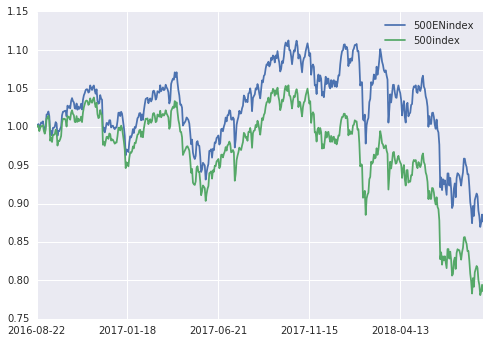

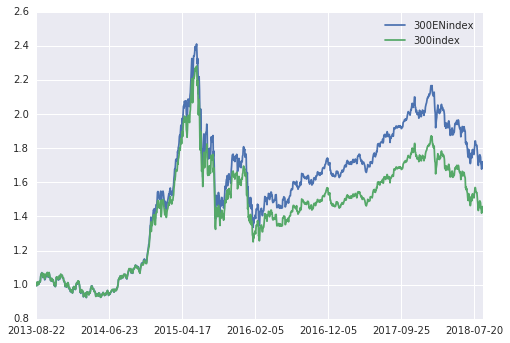

In [ ]:

a=pd.concat([Indextype_500EI,Indextype_500I],axis=1)
a.columns=["500ENindex","500index"]

a.plot()
B=pd.concat([Indextype_300EI,Indextype_300I],axis=1)
B.columns=["300ENindex","300index"]

B.plot()
